#Hotel Bookings Cancellation Forecasting </strong></p>

In [1]:
!pip install catboost
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3421 sha256=9facf3543344e29570979d6391ff099e9f08e1d257fd4b739b84f2edf08dcb5f
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3224 sha256=f3445fcd025ccbf97dcb1d7e7aec2842204640845096b865475194afdb504f02
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [3]:
# reading dataset
df = pd.read_csv('hotel_booking.csv')

# displaying first 5 rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.shape

(119390, 36)

we can see that there are total of 36 columns with 119390 rows




In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Data types:

1. 16 to be precise, are of the object data type (often representing
   strings or categorical data)
2. 16 columns are of the int64 data type, representing integer values.
3. 4 columns are of the float64 data type, which typically denotes decimal
   values.




In [6]:
# summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Insights:

1. Cancellation Rate: A considerable percentage of booking cancellations was indicated by the dataset's around 37% cancellation rate of bookings.
2. Average Lead Time: Based on 104 days, or around 3.5 months, it can be inferred that guests usually book their visits far in advance.
3. Guest composition: An adult-centric guest profile is evident, with an average of 1.8 adults and 0.1 children per booking.
4. Guest Loyalty: The low percentage of customer loyalty is shown by the fact that just 3% of guests return.
5. The median lead time, which is 69 days, gives a central trend for how long reservations take to plan.
6. Weekend Stays: Weekend stays range from 0.93 nights on average for guests, with some people staying up to 19 nights.
7. Weekend Stays: Weekend stays range from 0.93 nights on average for guests, with some people staying up to 19 nights.
8. Weeknight Stays: Weeknight stays can last anywhere from 0 to 50 nights, with an average length of 2.5 nights.
9. The average daily rate, or ADR, is now about 101.83. Rates can, however, occasionally go outside of the usual range, which could point to mistakes or unique situations.
10. Parking spots: Guests typically need 0.06 parking spots, while some reservations call for up to 8 spaces, reflecting a range of parking demands.
11. Special Requests: Travellers typically submit 0.57 special requests on average, although some reservations include up to 5 requests, illustrating a range of traveller preferences.


In [7]:
# summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [8]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000



Missing values:

1. The column children has 4 missing values.
2. The column country has 488 missing values
3. The column agent has 16,340 missing values.
4. The column company has a significant number of missing values, totaling
    112,593

# **EDA**

### **Top 10 countries of origin of Hotel visitors**

Text(0, 0.5, 'Reservation Count')

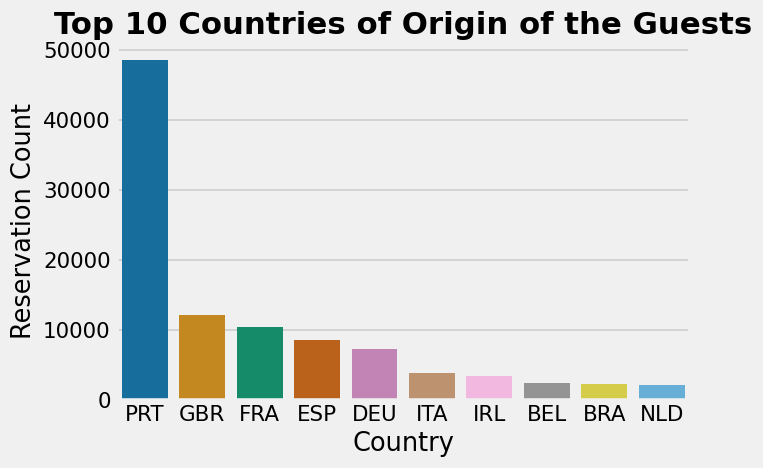

In [9]:
df['country'].value_counts(normalize = True)[:10]
plt.figure(figsize=(6,4), dpi=110)
sns.countplot(data=df, x='country',order=pd.value_counts(df['country']).iloc[:10].index, palette='colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')

Observation:Out of the visitors for the hotels in 2015,2016,2017, most visitors are from PRT followed by GBR

### **Analysing cancellation trends unique to various hotel categories:**

In [10]:
df.groupby(['hotel'])['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

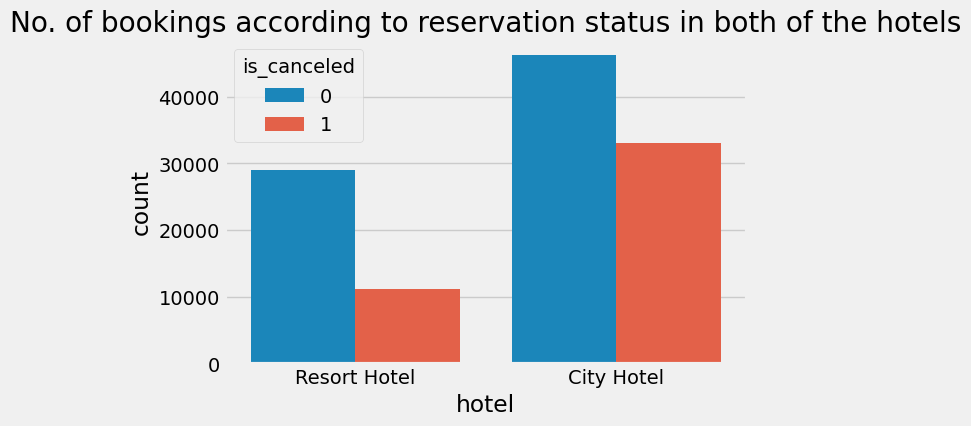

In [11]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'hotel', data = df, hue = 'is_canceled')
plt.title("No. of bookings according to reservation status in both of the hotels")
plt.show()

We have most bookings for city hotel compared to resort type hotel.
The number of bookings that are cancelled for city hotel are 33102, and not cancelled are 46228, whereas for the Resort hotel are 28938, and cancelled are 11122.


### **Determining how visits are distributed among various market sectors:**

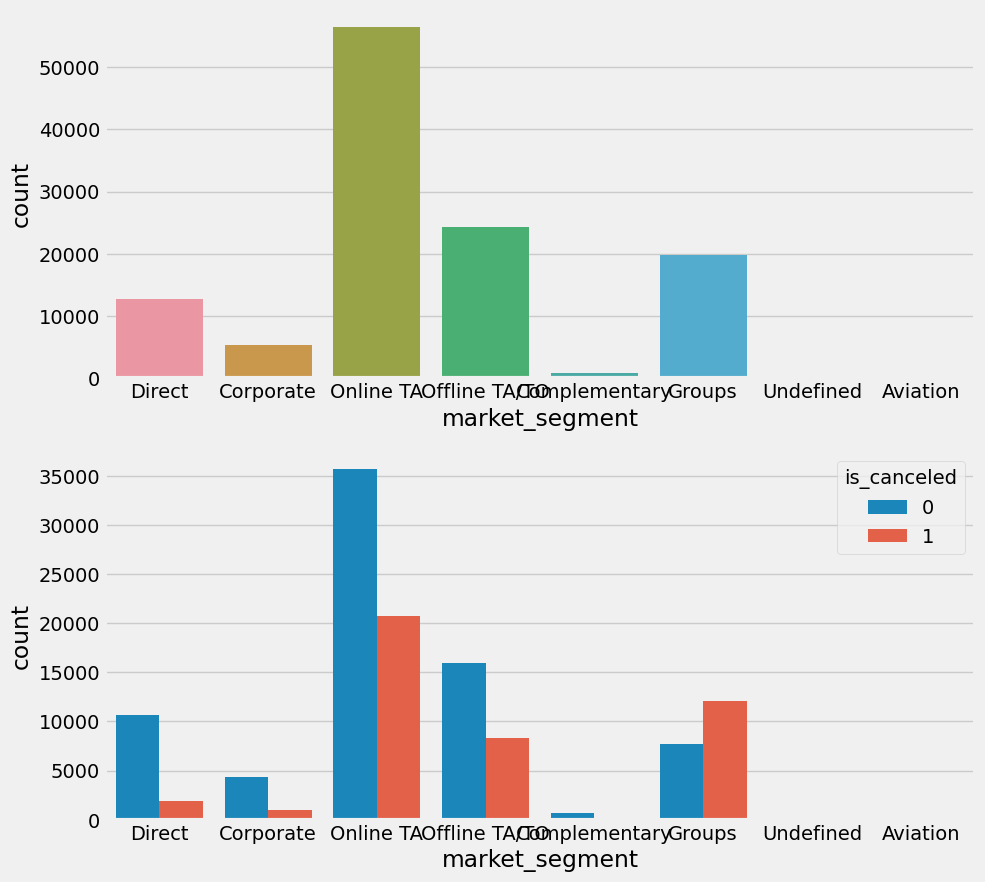

In [12]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'market_segment', data = df, ax = ax[0])
sns.countplot(x = 'market_segment', data = df, hue = 'is_canceled', ax = ax[1])
plt.show()

Insights: The chart shows the no. of bookings by different market segment as per the reservation status.
Online TA -> Offline TA -> Groups -> Direct -> Corporate
Descending order of No. of bookings.

Online TA occupies the top market sector for hotel booking followed by offline TA and least being complementary.

### **Bookings based on month and year Wise**

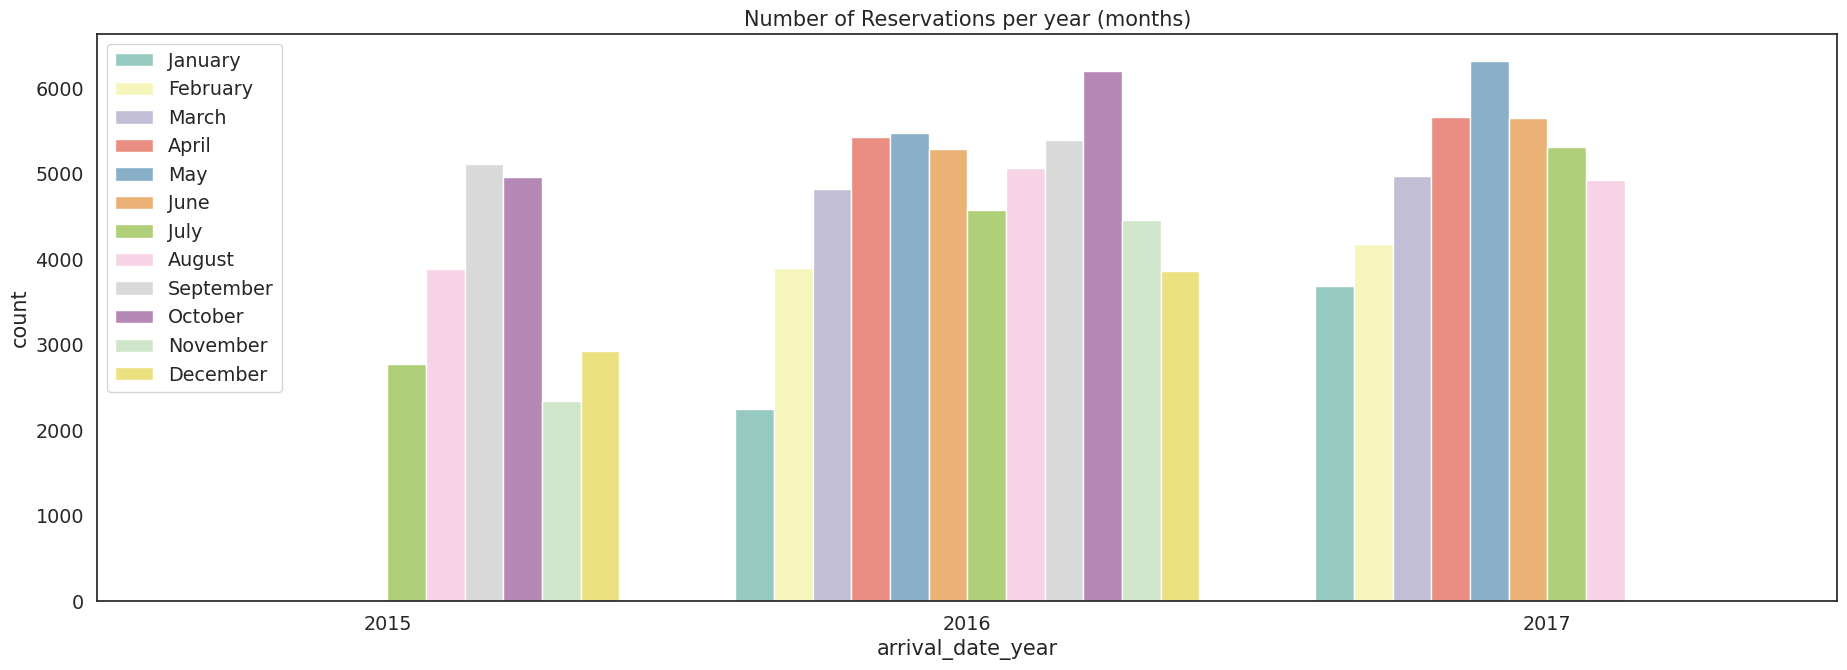

In [13]:
# parameters
plt.rcParams['figure.figsize'] = [20, 7]
sns.set(style='white', font_scale=1.25)

# plot
arrival = sns.countplot(x='arrival_date_year', hue='arrival_date_month', data=df, palette='Set3',
                        hue_order=['January', 'February', 'March', 'April', 'May', 'June',
                                   'July', 'August', 'September', 'October', 'November', 'December'])
arrival.set(title="Number of Reservations per year (months)")
plt.legend(loc='upper left')
plt.show()

Insights: we can see many bookings vary from month to month in all the years, however if see particularly quarter 2 and quater 3  in 2016 has higher bookings

### **Identifying trends and patterns in the cancelation rates across several years:**

In [14]:
df.groupby(['arrival_date_year'])['is_canceled'].mean()

arrival_date_year
2015    0.370158
2016    0.358633
2017    0.386979
Name: is_canceled, dtype: float64

Insights: Cancellation rates have remain almost consistent in all 3 years around 35-36%.

### **Finding Peak Visitor Periods to pinpoint and measure the month that sees the largest influx of tourists:**

In [15]:
order = ['January',
 'February', 'March' ,'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December' ]

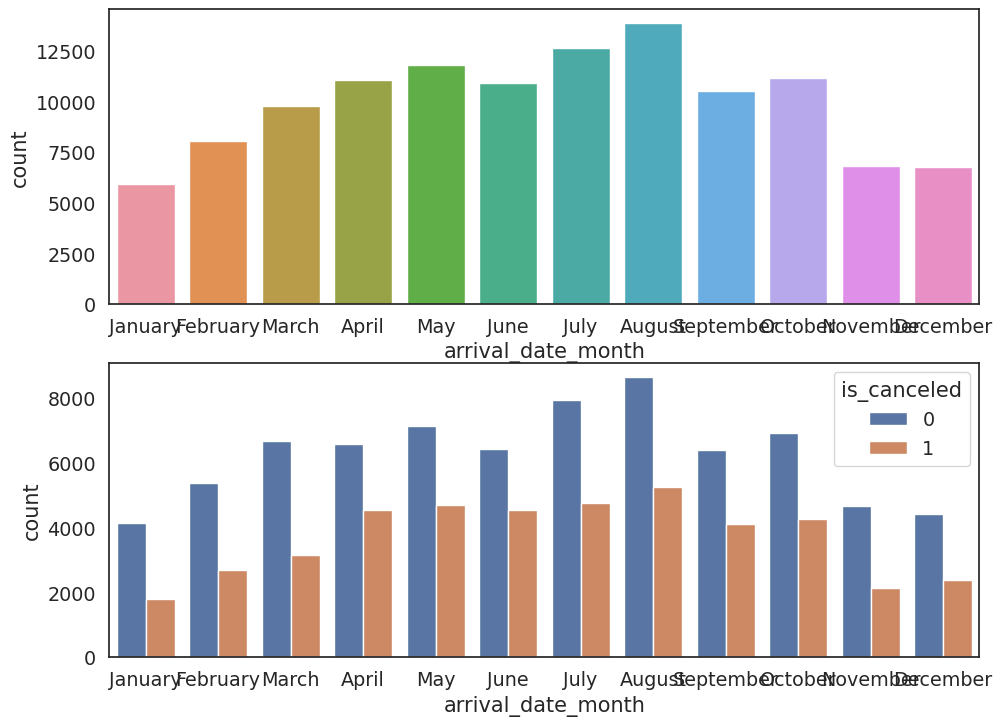

In [16]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'arrival_date_month', data = df, ax = ax[0], order = order)
sns.countplot(x = 'arrival_date_month', data = df, hue = 'is_canceled', ax = ax[1], order = order)
plt.show()

Insights: The cancellation rate is quite consistently high during april to october having its peak at august.

### **Examining the relationship that exists between the deposit types and the probability of cancellations:**

In [17]:
#group data for deposit_type:
deposit_cancel_data = df.groupby("deposit_type")["is_canceled"].describe()
deposit_cancel_data

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,104641.0,0.283770,0.450829,0.0,0.0,0.0,1.0,1.0
Non Refund,14587.0,0.993624,0.079595,0.0,1.0,1.0,1.0,1.0
Refundable,162.0,0.222222,0.417029,0.0,0.0,0.0,0.0,1.0


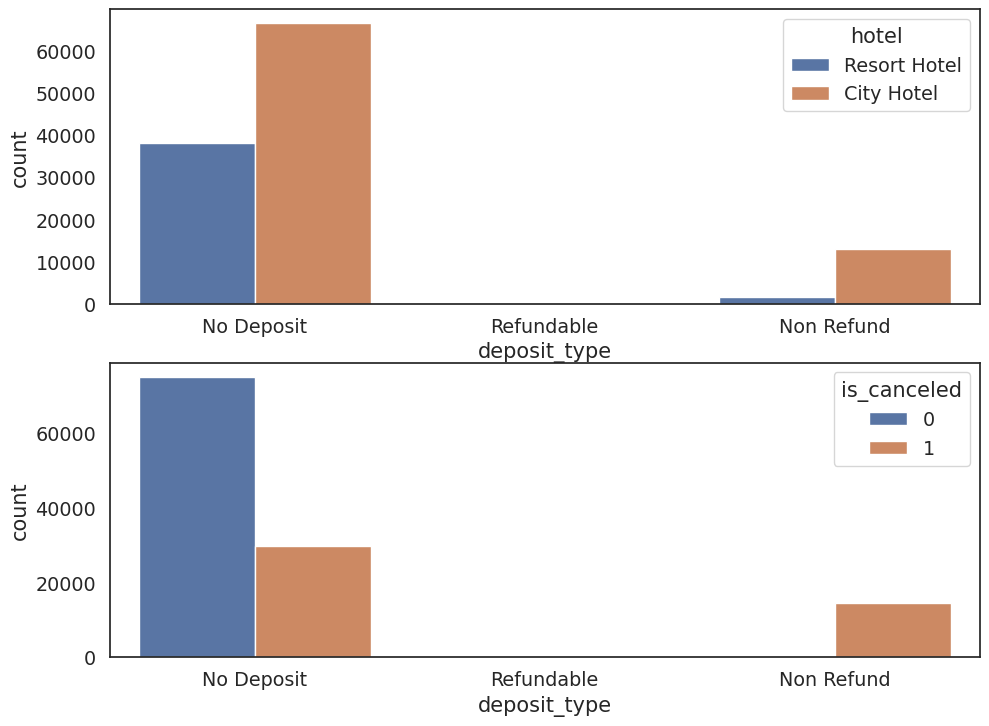

In [18]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'deposit_type', data = df, hue = 'hotel', ax = ax[0])
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled', ax = ax[1])
plt.show()

Deposit type has 3 categories - No Deposit, refundable, Non Refund.

Either customers have opted for no deposit or non refundable deposits.
Maybe refundable deposit type is not offered by the hotels.
All of the non refund bookings have been cancelled in our dataset. That might prove important feature based on how many such bookings are part of cancelled bookings.

No hotel has refundable deposit type


NO Deposit is more cancellation , let's show it in visualization  99% of people how No deposit have canceled their hotel bookings


### **Top Countries with Highest Cancellation Rates.**

In [19]:
df.groupby(['country'])['is_canceled'].agg( np.mean).sort_values(ascending = False).head(30)

country
KHM    1.000000
BEN    1.000000
GGY    1.000000
GLP    1.000000
HND    1.000000
IMN    1.000000
JEY    1.000000
MYT    1.000000
NIC    1.000000
FJI    1.000000
UMI    1.000000
VGB    1.000000
MAC    0.937500
HKG    0.896552
TJK    0.888889
ARE    0.843137
FRO    0.800000
BHR    0.800000
BGD    0.750000
MDV    0.750000
QAT    0.733333
SEN    0.727273
AND    0.714286
SAU    0.687500
IDN    0.685714
GEO    0.681818
PAK    0.642857
PHL    0.625000
NGA    0.617647
GIB    0.611111
Name: is_canceled, dtype: float64

These are the top 30 countries out of 177 countries with mean cancellation rate > 60%.

### **Calculating and examining how lead time variations affect the probability of cancellations:**

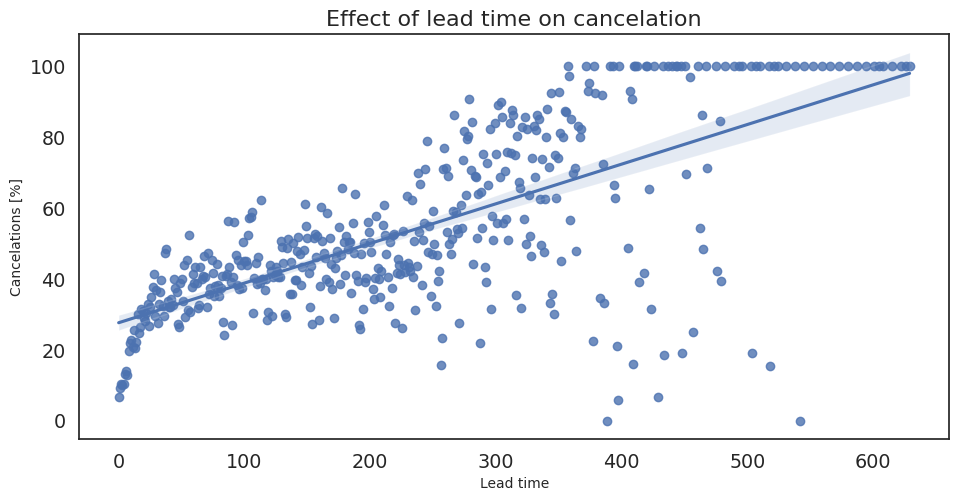

In [20]:

# group data for lead_time:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()

# use only lead_times with more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(10,5))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time",fontsize=10)
plt.ylabel("Cancelations [%]", fontsize=10)
# plt.xlim(0,365)
plt.show()

Insights: Bookings made a few days before the arrival date are rarely canceled, whereas bookings made over one year in advance are canceled very often.

**Meal type effect on Cancellations:**

In [21]:
df.groupby('meal')['is_canceled'].value_counts()

meal       is_canceled
BB         0              57800
           1              34510
FB         1                478
           0                320
HB         0               9479
           1               4984
SC         0               6684
           1               3966
Undefined  0                883
           1                286
Name: is_canceled, dtype: int64

Text(0, 0.5, 'Reservation Count')

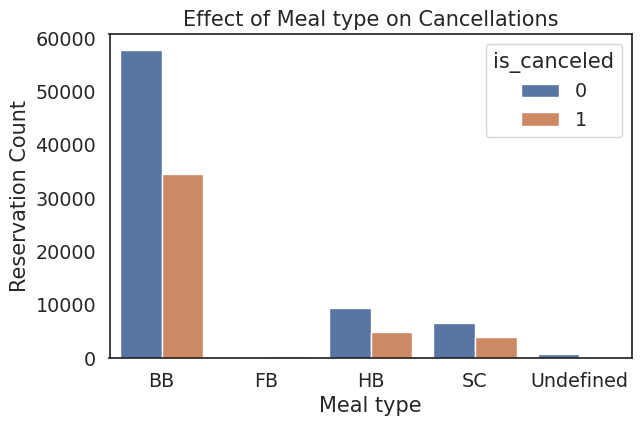

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x= 'meal', hue = 'is_canceled')
plt.title ('Effect of Meal type on Cancellations')
plt.xlabel("Meal type")
plt.ylabel('Reservation Count')

### **Assessing the percentage distribution of meal reservations to determine the frequency of various meal options among visitors:**

<Figure size 1500x600 with 0 Axes>

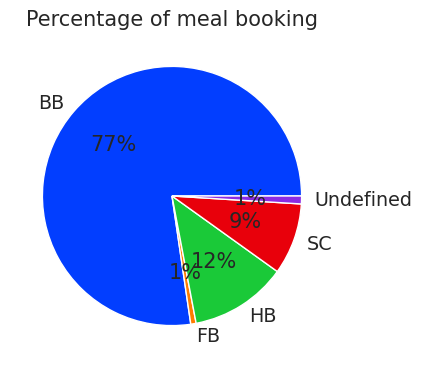

In [23]:
plt.figure(figsize=(15,6))
df_pie = df.groupby(['meal']).agg({'hotel':'count'}).reset_index()
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize=(10,4))

plt.pie(df_pie['hotel'], labels = df_pie.meal , colors = colors, autopct='%.0f%%')
plt.title('Percentage of meal booking')
plt.show()

Most of the visitors prefer bed & breakfast (BB) followed by full board (FB), half board (HB) and self cater (SC)

# **Examining the variations in nightly prices across the year's several seasons:**

In [24]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [25]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [26]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

Seasonal Variation: Rates for city and resort hotels typically fluctuate throughout the year, with noticeable hikes in the months that see the highest volume of tourism.August is the month with the highest costs, showing that this is the busiest time of year for resort hotels.November had the lowest prices, indicating a period of less demand. City Hotel Rates: City hotels have yearly rates that are largely consistent.There is a minor price rise in August, maybe as a result of more demand.

In [27]:
from catboost.core import DataFrame
# absolute cancelations:
total_cancelations = df["is_canceled"].sum()
rh_cancelations = df.loc[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = df.loc[df["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cancelations / df.shape[0] * 100
rh_rel_cancel = rh_cancelations / df.loc[df["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelations / df.loc[df["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 44,224 (37 %)
Resort hotel bookings canceled: 11,122 (28 %)
City hotel bookings canceled: 33,102 (42 %)


Total Cancellations: Of the bookings in the dataset, 44,224 have been cancelled in total, or 37% of all bookings. This shows a sizable percentage of cancellations, highlighting how crucial it is for the hotel sector to comprehend and handle cancellations.
Refunds according to Hotel Type:
Resort Hotel: Of all the reservations made, the Resort Hotel had 11,122 cancellations, or 28% of the total. This implies that, in comparison to the entire dataset, Resort Hotels have a comparatively lower cancellation rate.
City Hotel: In contrast, the City Hotel saw a larger percentage of cancellations—33,102, or 42% of all reservations—than any other hotel. This suggests that reservations for City Hotels are more erratic, which might be impacted by things like last-minute travel or business travel.
The City Hotel has a greater cancellation rate than the Resort Hotel. This might be because reservations for city destinations—such as business trips—are different from those for resort destinations—such as leisure holidays.
Given that resort hotels have comparatively lower cancellation rates, travellers who book these kinds of lodgings may have more flexible schedules or longer booking windows.


# **Determine the trends and patterns in the percentage of cancellations for each kind of hotel during the various seasons:**

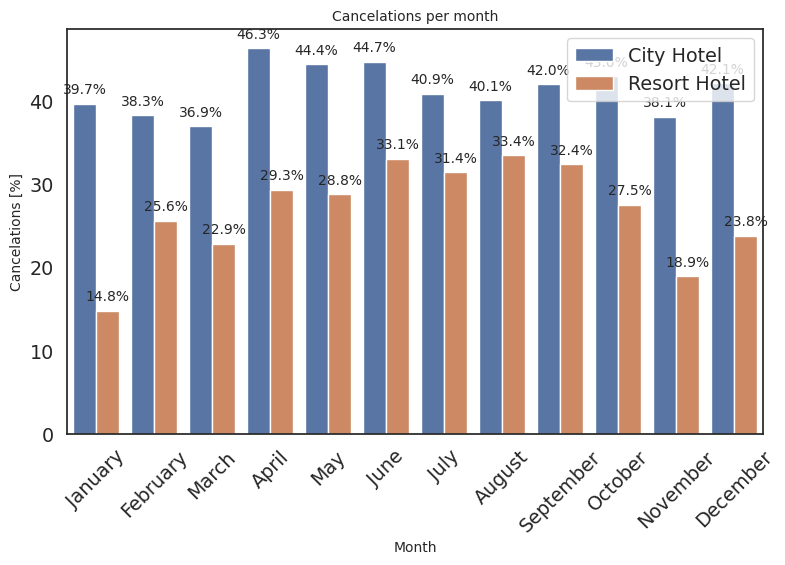

In [28]:
# Create a DateFrame with the relevant data:
res_book_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Month", y="cancel_percent", hue="Hotel",
                 hue_order=["City Hotel", "Resort Hotel"], data=full_cancel_data)

# Annotate the bars with percentage values
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title("Cancelations per month", fontsize=10)
plt.xlabel("Month", fontsize=10)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=10)
plt.legend(loc="upper right")
plt.show()

it is clear that highest cancellations are in April followed by June and may.

# **Overall Analysis:**

**Trends in Reservations and Cancellations:**

*   Reservations for city hotels are more than those for resort hotels.
*   37% of all reservations were cancelled, with cancellation rates higher in urban hotels.
*   Over the years, city hotels have consistently dominated booking patterns; but, in 2017, bookings for both categories of hotels decreased.
*   Monthly and Length of Stay Trends: Historically, the months with the most reservations are July and August.
*   In city hotels, most reservations are for one to four days, and in resort hotels, for one to seven days.

**Guest Demographics:**
*   The majority of visitors are from Europe, with Portugal (PRT) ranking as the most popular destination.
*   The low number of repeat customers suggests that there may be room for rewards or loyalty programmes. Trends in Reservations and Cancellations: Reservations for city hotels are more than those for resort hotels.

**Meal Preferences:**
*   Full board (FB), half board (HB), self-cater (SC), and bed and breakfast (BB) are the most popular meal plans.

**Analysis of Cancellations:**
*  Online travel agents (TA) and group reservations are responsible for the majority of cancellations.
*	Reducing cancellations could be accomplished by enforcing tougher refund guidelines or demanding upfront payments.




# **Data pre-processing**

we are removing few customer specific columns which are confidential like name, email, phone number, credit card.


In [29]:
# Rename the columns to be more readable
df.rename(columns={'adr': 'average_daily_rate'},inplace=True)
df.head()

# drop company column which is personal for user
df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1, inplace=True)

# Impute missing values in 'children' column with 0
df['children'] = df['children'].fillna(0)

In [30]:
# Analyze noisy data
noisy_data = {
    'average_daily_rate': df[df['average_daily_rate'] < 0],
    'adults':   df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies':   df[df['babies'] == 10],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'average_daily_rate': 1, 'adults': 403, 'children': 1, 'babies': 1}

**ADR (Average Daily Rate):** It has been observed that the minimum value of ADR is -6.38.

Implication:
* Since negative rates are irrational, they may be mistakes or exceptional circumstances.

**Adults:** Adults have a minimum value of 0.

Implication:
* Unless there are valid instances when only infants or youngsters reserve a hotel, reservations made without any adults may be a sign of a data input mistake.

**Children and Babies:** It has been observed that the maximum value for both groups is 10.

Implication:
* An outlier or data input error might be the cause of an abnormally high figure for a single reservation.


In [31]:
# Replace negative adr with median of adr column
df.loc[df['average_daily_rate'] < 0, 'average_daily_rate'] = df['average_daily_rate'].median()

# Remove rows with 0 adults
df = df[df['adults'] != 0]

# Remove rows with 10 children or 10 babies
df = df[df['children'] != 10]
df = df[df['babies'] != 10]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'average_daily_rate': df[df['average_daily_rate'] < 0],
    'adults': df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies': df[df['babies'] == 10],
}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

{'average_daily_rate': 0, 'adults': 0, 'children': 0, 'babies': 0}

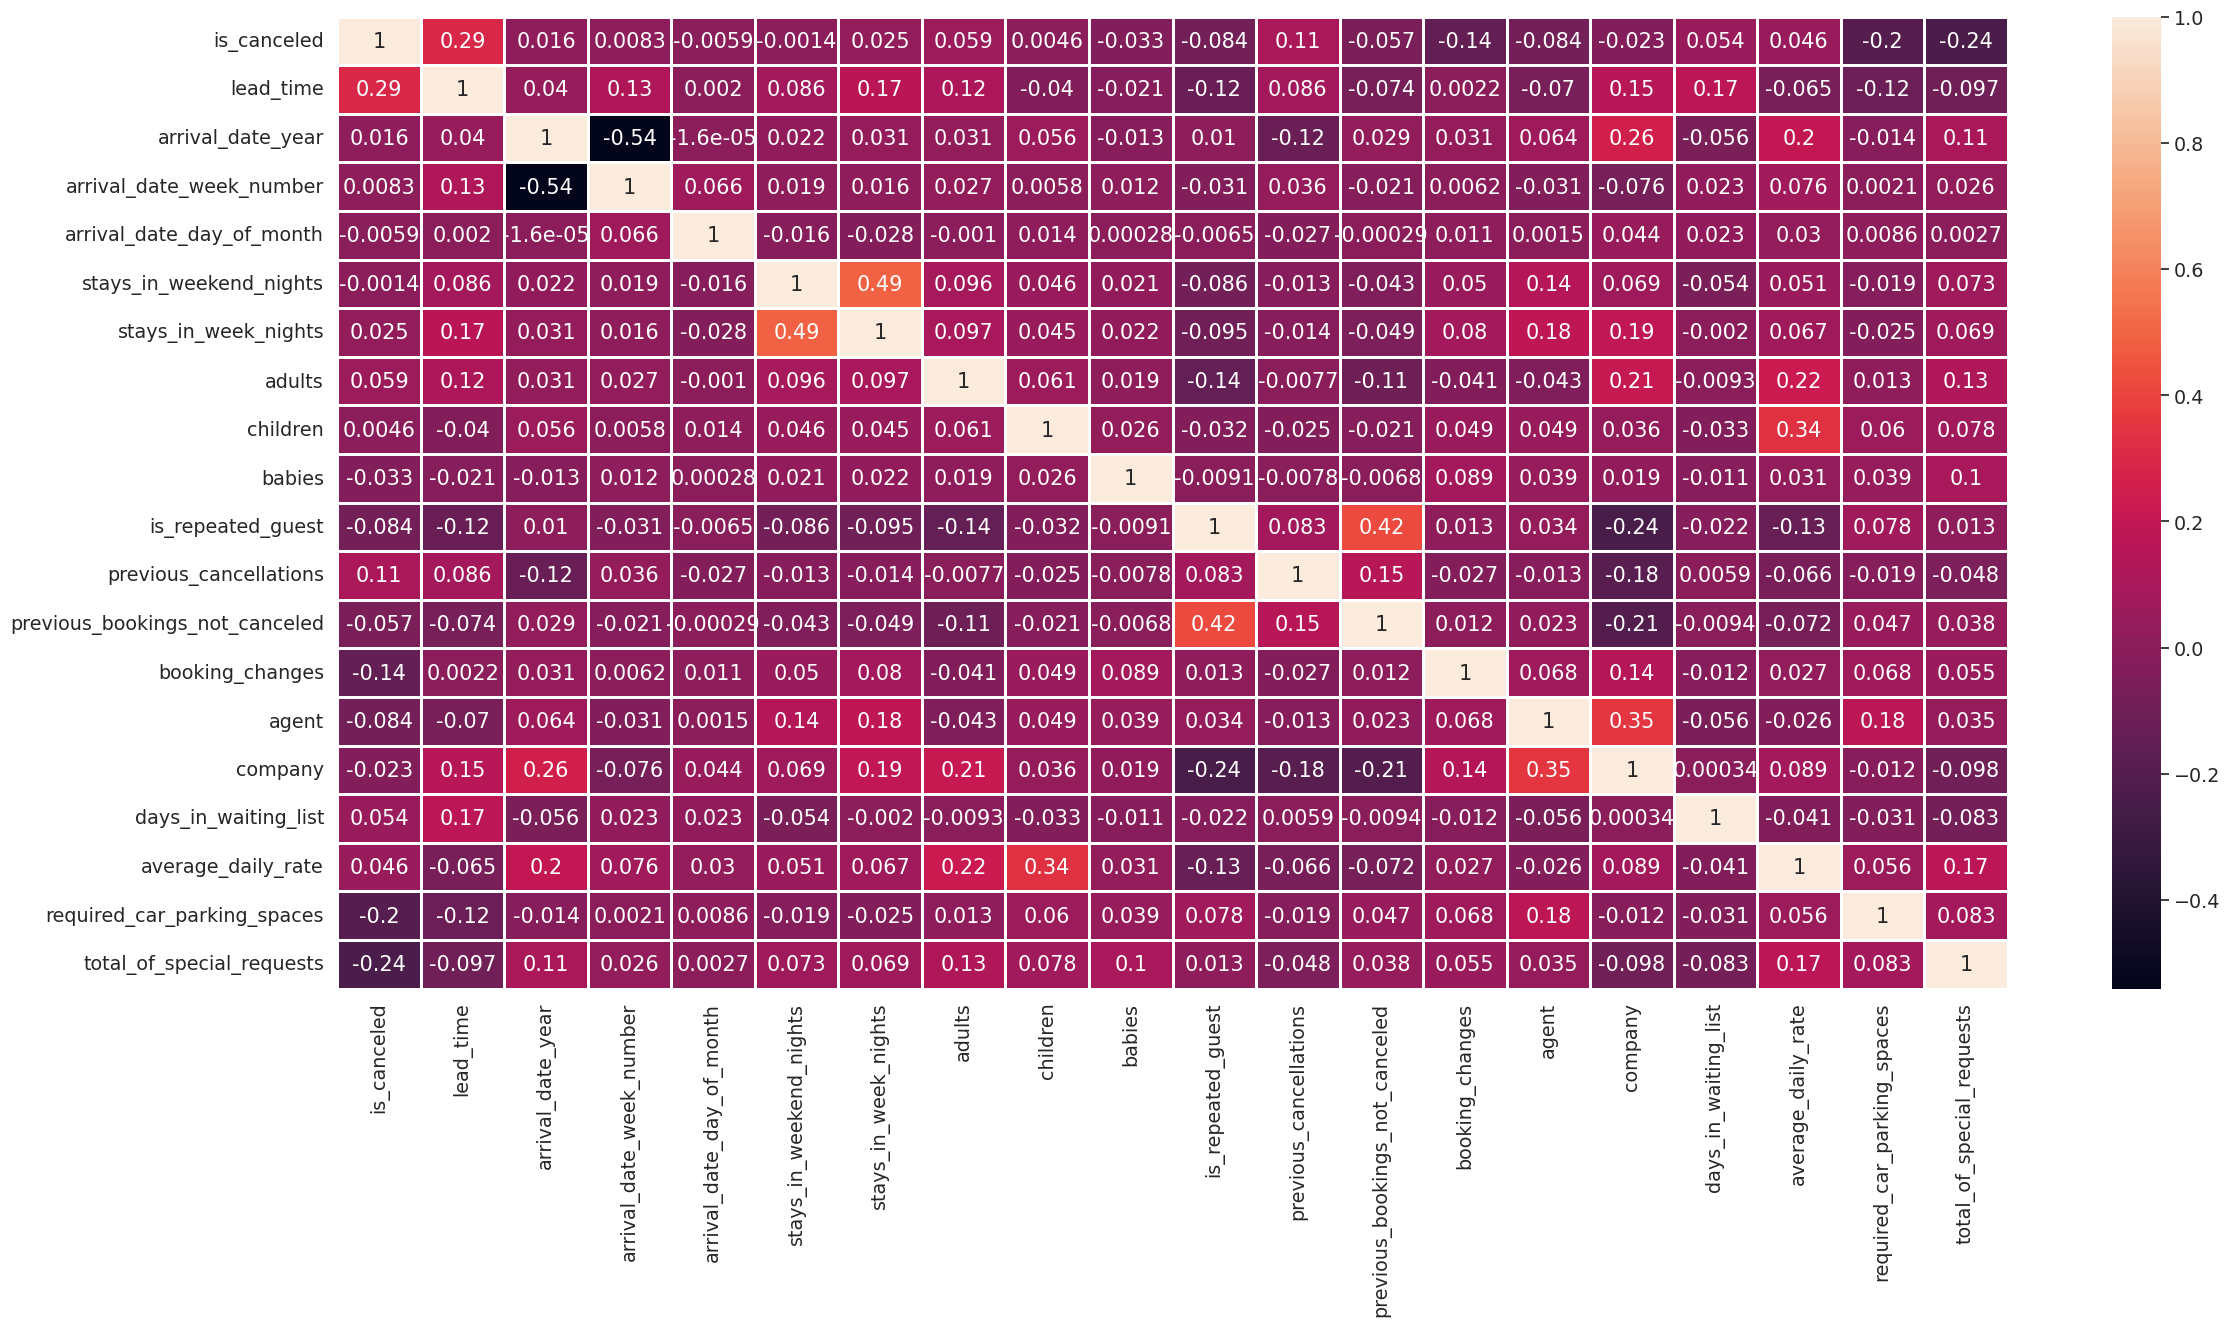

In [32]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()


In [33]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292988
total_of_special_requests         0.235267
required_car_parking_spaces       0.195864
booking_changes                   0.144892
previous_cancellations            0.110223
is_repeated_guest                 0.083797
agent                             0.083510
adults                            0.058891
previous_bookings_not_canceled    0.057414
days_in_waiting_list              0.054358
average_daily_rate                0.046440
babies                            0.033470
stays_in_week_nights              0.025305
company                           0.023174
arrival_date_year                 0.016467
arrival_date_week_number          0.008310
arrival_date_day_of_month         0.005876
children                          0.004570
stays_in_weekend_nights           0.001428
Name: is_canceled, dtype: float64

Findings from the Target Variable (is_canceled) Feature Correlation:

**Strong Positive Correlations:**
* lead_time (0.293): The chance of cancellation and lead time have a moderately positive association. This implies that the likelihood of a cancellation tends to grow along with the lead time, or the number of days from the date of booking to the arrival.
*	total_of_special_requests (0.235): A moderately positive correlation suggests that there is a positive link between the number of special requests and the chance of not cancelling.
*	required_car_parking_spaces (0.196): Bookings that include a necessity for car parking spaces are a little more likely to be cancelled, according to the moderately positive correlation.

**Weak Positive Correlations:**
*	booking_changes (0.145): According to this weak positive correlation, there is a marginally greater chance of cancellation for every rise in booking changes.
•	previous_cancellations (0.110): A weakly positive correlation suggests that there is a somewhat higher chance of cancellations in the future if there has been a history of cancellations.

**Weak Negative Correlations:**
*	is_repeated_guest (0.084): This correlation indicates that there is a minor reduction in the likelihood of cancellation for repeated visitors.
*	agent (0.084): A somewhat negative correlation suggests that reservations booked via an agent have a marginally lower chance of being cancelled.
*	adults (0.059): Bookings with more adults appear to have a somewhat lower chance of being cancelled, according to a weak negative association.

Additional factors like newborns, stays in weekend nights, company, arrival date year, arrival date week number, arrival date day of month, prior reservations not cancelled, days in waiting list, and average daily rate have weak correlations.


In [34]:
# dropping columns that are not useful
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list','agent','company']

df.drop(useless_col, axis = 1, inplace = True)

we are dropping, because these features have a large percentage of missing values, are highly cardinally related, or have no direct correlation with the cancellation rate (is_canceled). The children feature, on the other hand, which is a numerical characteristic with a very tiny percentage of missing data (0.003350%), will be kept. It makes sense to impute the missing values with 0, aligning with the column's mode, given the distribution of values in the children column, where 0 children is the prevalent mode.

In [35]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,No Deposit,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,Transient,98.0,0,1,2015-07-03


We need encode the categorical variables, which is useful for the model creation and analysis:

In [36]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [37]:
cat_df = df[cat_cols]
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [38]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [39]:
cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [40]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [41]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [42]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})
cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})
cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [43]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [44]:
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,average_daily_rate,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118980,23,35,30,2,5,2,0.0,0,0,0,0,96.14,0,0
118981,102,35,31,2,5,3,0.0,0,0,0,0,225.43,0,2
118982,34,35,31,2,5,2,0.0,0,0,0,0,157.71,0,4
118983,109,35,31,2,5,2,0.0,0,0,0,0,104.40,0,0


In [45]:
num_df.var()

lead_time                         11425.771805
arrival_date_week_number            184.925787
arrival_date_day_of_month            77.110289
stays_in_weekend_nights               0.990492
stays_in_week_nights                  3.601090
adults                                0.324973
children                              0.151448
babies                                0.008662
is_repeated_guest                     0.030555
previous_cancellations                0.715209
previous_bookings_not_canceled        2.248618
average_daily_rate                 2545.017384
required_car_parking_spaces           0.060293
total_of_special_requests             0.627905
dtype: float64

In [46]:
# normalizing numerical variables

num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
#num_df['agent'] = np.log(num_df['agent'] + 1)
#num_df['company'] = np.log(num_df['company'] + 1)
num_df['average_daily_rate'] = np.log(num_df['average_daily_rate'] + 1)

In [47]:
num_df.var()

lead_time                         2.583833
arrival_date_week_number          0.440549
arrival_date_day_of_month         0.506490
stays_in_weekend_nights           0.990492
stays_in_week_nights              3.601090
adults                            0.324973
children                          0.151448
babies                            0.008662
is_repeated_guest                 0.030555
previous_cancellations            0.715209
previous_bookings_not_canceled    2.248618
average_daily_rate                0.513989
required_car_parking_spaces       0.060293
total_of_special_requests         0.627905
dtype: float64

In [48]:
num_df.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,average_daily_rate,required_car_parking_spaces,total_of_special_requests
0,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0,0
1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0,0
2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,4.330733,0,0
3,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,4.330733,0,0
4,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,4.595120,0,1


In [49]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [50]:
X.shape, y.shape

((118985, 24), (118985,))

# **Splitting the data for Training and Testing:**

In [51]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [52]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,average_daily_rate,required_car_parking_spaces,total_of_special_requests
47517,1,0,3,2,1,0,2,2,2,27,4.753590,2.302585,3.332205,2,3,1,0.0,0,0,0,0,4.110874,0,0
13226,0,0,2,2,6,0,0,3,3,18,4.955827,3.465736,1.791759,2,5,3,1.0,0,0,0,0,5.739793,0,0
87055,1,0,2,2,1,0,0,2,4,17,4.317488,2.833213,2.639057,0,4,2,0.0,0,0,0,0,4.609660,0,1
75743,1,0,5,2,1,0,2,0,7,6,5.616771,3.401197,2.944439,2,2,2,0.0,0,0,1,0,4.143135,0,0
81267,1,2,3,2,1,0,2,0,12,12,1.945910,3.931826,2.397895,0,2,1,0.0,0,0,0,0,0.000000,0,0


In [53]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,average_daily_rate,required_car_parking_spaces,total_of_special_requests
82550,1,0,0,0,1,0,0,2,1,6,0.000000,1.098612,1.791759,0,1,2,0.0,0,0,0,0,4.454347,0,0
41294,1,2,3,2,1,0,2,0,8,16,3.688879,3.526361,2.708050,0,2,2,0.0,0,0,0,0,4.700480,0,0
48346,1,3,2,2,1,0,0,2,3,8,3.332205,2.639057,3.135494,0,3,2,0.0,0,0,0,0,4.867534,0,0
39557,0,2,0,0,0,0,0,3,8,22,5.616771,3.526361,2.833213,2,4,2,1.0,0,0,0,0,5.416545,1,3
75904,1,2,3,2,1,3,2,0,7,6,5.899897,3.761200,2.833213,0,2,2,0.0,0,0,1,0,4.629863,0,0


In [54]:
y_train.head(), y_test.head()

(47517    1
 13226    1
 87055    0
 75743    1
 81267    0
 Name: is_canceled, dtype: int64,
 82550    0
 41294    0
 48346    1
 39557    0
 75904    1
 Name: is_canceled, dtype: int64)

# **Model Building**

# ***Logistic Regression***

In [55]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
confusion_matrics = classification_report(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr, output_dict=True)
report = pd.DataFrame(clf_report)
weighted_avg_f1_score_lr = clf_report['weighted avg']['f1-score']
print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{confusion_matrics}")
#print(f"Classification Report : \n{report}")
print("F1-score:", weighted_avg_f1_score_lr)


Accuracy Score of Logistic Regression is : 0.8127241147467503
Confusion Matrix : 
[[21275  1264]
 [ 5421  7736]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     22539
           1       0.86      0.59      0.70     13157

    accuracy                           0.81     35696
   macro avg       0.83      0.77      0.78     35696
weighted avg       0.82      0.81      0.80     35696

F1-score: 0.8030621917608519


The Logistic Regression model's accuracy score is around 81.1%, meaning that for roughly 81.1% of the test set's instances, the model accurately predicted the target variable.
True Positives (TP): 7,732 cases were accurately classified as class 1 in the confusion matrix.
True Negatives (TN): 21,200 cases were classified as class 0 with accuracy.
False Positives (FP): 1,243 cases were misclassified as class 1 in error.
False Negatives (FN): 5,521 cases were misclassified as class 0 in error.
F1-score, recall, and precision:
Precision: Class 1 has a precision of 0.86, meaning that 86% of the time the model predicts class 1 correctly.
Recall (Sensitivity): Class 1 has a recall of 0.58, meaning that 58% of the real instances of class 1 were caught by the model. f1-score: A weighted average F1-score of 0.80 strikes a balance between recall and accuracy. It offers a general indicator of the model's effectiveness across all classes.


# ***KNN***

In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
confusion_matrics = classification_report(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn, output_dict=True)
report = pd.DataFrame(clf_report)
weighted_avg_f1_score_knn = clf_report['weighted avg']['f1-score']
print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{confusion_matrics}")
print("F1-score:", weighted_avg_f1_score_knn)


Accuracy Score of KNN is : 0.8968511878081578
Confusion Matrix : 
[[21885   654]
 [ 3028 10129]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     22539
           1       0.94      0.77      0.85     13157

    accuracy                           0.90     35696
   macro avg       0.91      0.87      0.88     35696
weighted avg       0.90      0.90      0.89     35696

F1-score: 0.8943170755164788


The KNN model's accuracy score is around 86.3%, meaning that for roughly 86.3% of the test set's instances, the model successfully predicted the target variable. This is a useful place to start when assessing the model's overall effectiveness.
Confusion Matrix: The confusion matrix gives a thorough explanation of what forecasts were right and wrong.
True Positives (TP): 9,769 cases had class 1 predictions made accurately.
True Negatives (TN): 21,034 cases were classified as class 0 with accuracy.
False Positives (FP): 1,409 cases were misclassified as class 1 in error.
False Negatives (FN): 3,484 cases were misclassified as class 0 in error.
F1-score, recall, and precision:
Precision: Class 1 accuracy is 0.87, meaning that 87% of the time the model is right when it predicts class 1.
Recall (Sensitivity): Class 1 has a recall of 0.74, meaning that 74% of real class 1 occurrences were caught by the model.
F1-score: A weighted average F1-score of 0.86 strikes a balance between recall and accuracy
